<h1>Deutsch's Algorithm</h1>

<h2>What is it?</h2>
<p>Deutschs algortihm, also know as Deutschs-Jozsa algorithm, is devised by David Deutsch and Richard Jozsa in 1992. It is one of the earliest examples of a quantum algorithm advantage to be demonstarted.</p>

<p>It specifically reveals the possibility of exponential speed-ups using quantum computers by generalizing Deutschs algorithm.</p>


<h3>Deutschs Algorithm circuit [2] </h3>

![Alt text](Images/Circuit.png)

<h2>Explained [3] </h2>


<p>The algorithm determines between constant or balanced.It uses deutschs algorithm which is a binary function, f: {0,1}^n -> {0,1}, where n is the number of bits in the input. This function gurantees the output to be concistent of 0 for all outputs or 1 for all outputs. Otherwise it splits the outputs 50/50, half being 0, and half being 1.</p>

<h3>Example in table format [4]</h3>

![Alt text](Images/table_for_inputs.png)

<h3>2. Classical Solution.</h3>

In a classical setting, determining if the function is balanced and requires two queries. For instance, if f(0,0,0,..) -> 0 and f(1,0,0, ...)->, the function is balanced. However, confirming a constant function requires checking half of all possible inputs plus one, leading to 2^n - 1 + 1 trials.

![Alt text](Images/Constant.png)

This formula can express the probability that the function is constant.

<h3>3. Quantum solution </h3>

In the quantum realm, the problem can be solved with certainty after just one call to the function f(x), provided f is implemented as a quantum oracle. The quantum solution utilizes a quantum circuit and takes advantage of quantum parallelism.
<p>Example of Deutsch-Jozsa circuit</p>

![Alt text](Images/Deutsch-Jozsa-Circuit.png)


<p>Steps : </p>

1.  Prepare two quantum registers. The first is an n-qubit register intialised to |0> ,and the second is a one-qubit register intialized to |1>

<div style="text-align:center;">
  <img src="Images/p1.png" alt="Alt text" />
</div>



2.  Apply a Hadamard gate to each qubit:

<div style="text-align:center;">
  <img src="Images/hadamard.png" alt="Alt text" />
</div>

3.  Appy the quantum oracle ![Alt text](Images/Screenshot.png) :

<div style="text-align:center;">
  <img src="Images/quantum.png" alt="Alt text" />
</div>


4.  By this step, the second single qubit register may be ignored, You apply a hadamard gate to each qubit in the first register

<div style="text-align:center;">
  <img src="Images/hadamard3.png" alt="Alt text" />
</div>

5.  You then measure the first register. If the result is 0, then it is a constant, if the result is 1, then it is balanced.










<h2>Qiskit Implementation</h2>

Here we have the Deutschs algorithm implemented using Qizkit. First the enviroment is prepared. Then we set the length of the n-bit string. Then we use Qizkit to program. [5]

In [2]:
# useful additional packages 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 13  # the length of the first register for querying the oracle 

# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability, it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1, 2 ** n)  # this is a hidden parameter for a balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n + 1)  # all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])

# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:  # If the oracleType is "0", the oracle returns oracleValue for all input.
    if oracleValue == 1:
        djCircuit.x(qr[n])
else:  # Otherwise, it returns the inner product of the input with a (non-zero bitstring)
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])

# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])

# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])



The oracle returns a balanced function


Here we can see, that by repeating the above circuit code, the value on the graph will change with every time the code is called.

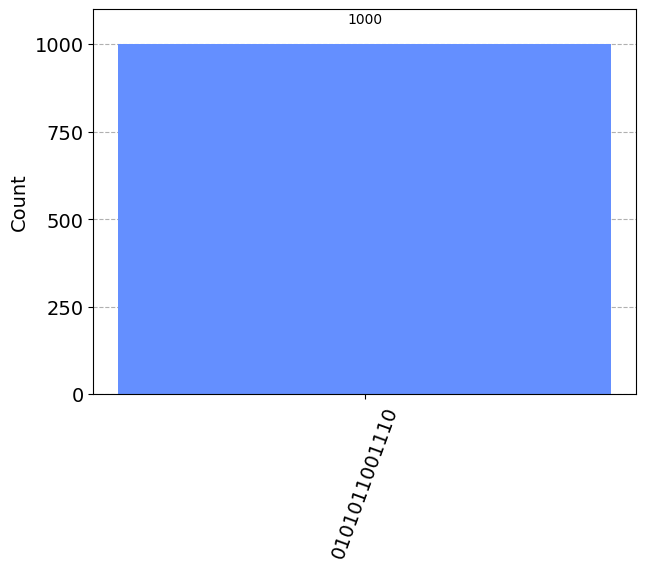

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
job = execute(djCircuit, backend=backend, shots=shots)
results = job.result() 
answer = results.get_counts()

plot_histogram(answer)

Here we have a representation of a Constant Oracle below, as discussed above this returns the same output for each input, it uses a random bit (0,1) to represent 

In [11]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

Below we have a repsentation of a balanced Oracle, as discussed above, this will produce half results in halves, half will be 0, half will be 1, the b_str represents which qubits have an x-gate applied.

In [12]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

Intial state for Algorithm [7]

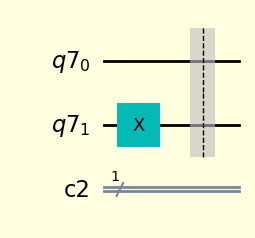

In [7]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

qreg1 = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
register1 = ClassicalRegister(1) 

qc = QuantumCircuit(qreg1, register1)

#qc.x(0)
qc.x(1)
qc.barrier()
qc.draw(output='mpl', style=style)

Then apply a hadamard gate

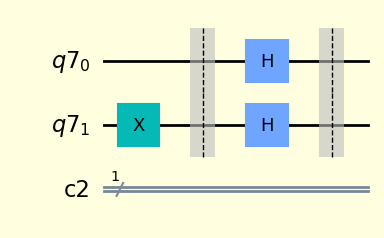

In [8]:
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl', style=style)

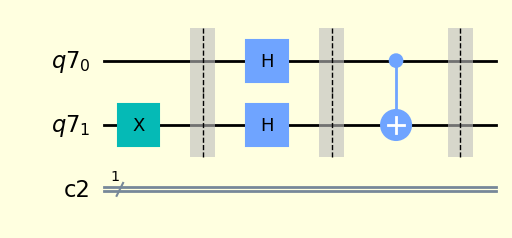

In [9]:
qc.cx(0,1)
qc.barrier()
qc.draw(output='mpl', style=style)

Apply a Hadamard Gate to the first qubit

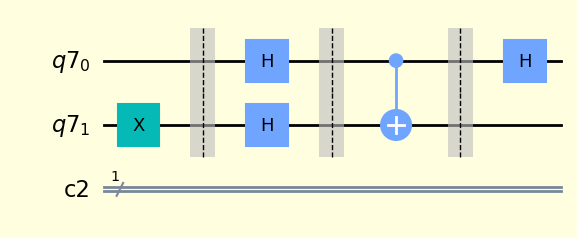

In [10]:
qc.h(0)
qc.draw(output='mpl', style=style)

Then show the probability of measure |1>a in the first qubit, this shows its not a balanced oracle.

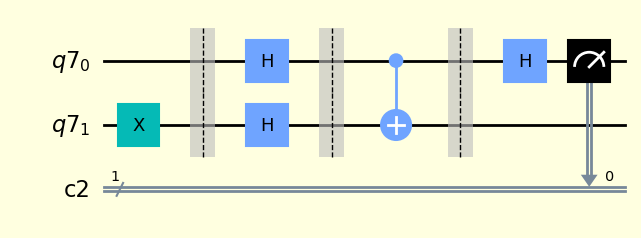

In [11]:
qc.measure(qreg1[0],register1)
qc.draw(output='mpl', style=style)

<h2>Bibliography</h2>

1.  https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm [1]
2.  https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_7.pdf [2]
3.  https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb [3]
4.  https://young.physics.ucsc.edu/150/deutsch.pdf [4]
5.  https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/deutsch_jozsa.ipynb [5]
6.  https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1992.0167 [6]
7.  https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/ [7]